# Predicting preference for cash among mobile money users in Kenya: A classification experiment.

___

## Package Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Making plots interactive
%matplotlib notebook

# Setting plot style
sns.set(color_codes=True)

import os

C:\Users\lap\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading and Viewing Data

In [2]:
os.chdir('C:\\Users\lap\Downloads')

data = pd.read_csv('mobile_money_data.csv')

In [3]:
data.head(3)

,start_time,end_time,hhid,account_num,account_type,weight,district,urban,gender,age,...,taken_loan,network_issues,clear_about_fees,transaction_failed,agent_low_cash,t_and_c_copy,complain_channel,issue_resolved,understand_data,fraud_victim
0,10/28/2019 9:05,10/28/2019 10:38,1001,1,Mobile Money,145.94444,District_A,Urban,male,32,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
1,10/28/2019 10:42,10/28/2019 11:43,1001,2,Bank Account,145.94444,District_A,Urban,male,32,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
2,10/28/2019 11:47,10/28/2019 12:53,1001,3,VSLA Account,145.94444,District_A,Urban,male,32,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               2442 non-null   object 
 1   end_time                 2442 non-null   object 
 2   hhid                     2442 non-null   int64  
 3   account_num              2442 non-null   int64  
 4   account_type             2442 non-null   object 
 5   weight                   2442 non-null   float64
 6   district                 2442 non-null   object 
 7   urban                    2442 non-null   object 
 8   gender                   2442 non-null   object 
 9   age                      2442 non-null   int64  
 10  hh_members               2442 non-null   int64  
 11  highest_grade_completed  2235 non-null   object 
 12  mm_account_cancelled     2442 non-null   object 
 13  prefer_cash              2395 non-null   object 
 14  mm_trust                

<IPython.core.display.Javascript object>


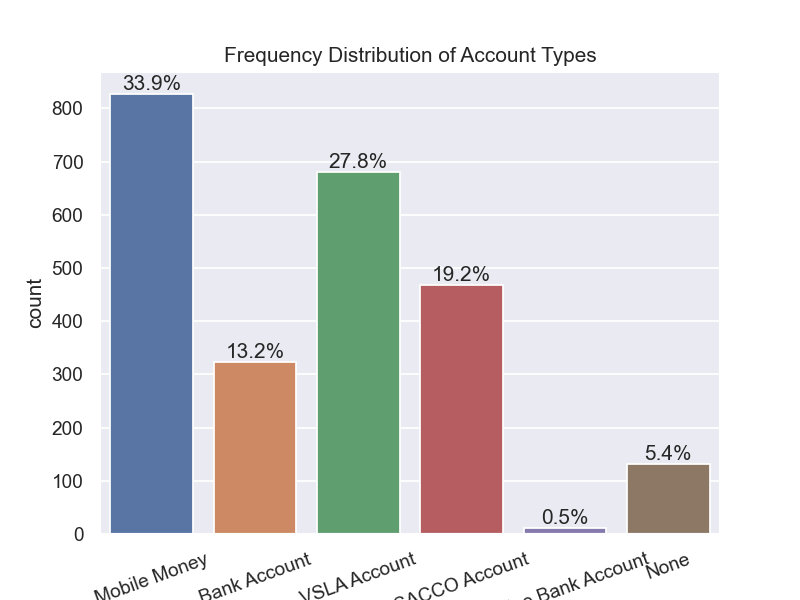

In [5]:
# Countplot of account types

# Creating the variable
types = data['account_type']

# Creating the countplot
ax = sns.countplot(data=data, x=types)

# Calculating percentage values
total_types = len(types)

for p in ax.patches:
    percentage_types = '{:.1f}%'.format(100 * p.get_height() / total_types)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage_types, (x, y), ha='center', va='bottom')

plt.title('Frequency Distribution of Account Types')
plt.xticks(rotation=20)
plt.show()

In [6]:
momo = (data[data["account_type"] == "Mobile Money"]).drop(["start_time", "end_time"], axis=1)
momo.head(3)

,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,...,taken_loan,network_issues,clear_about_fees,transaction_failed,agent_low_cash,t_and_c_copy,complain_channel,issue_resolved,understand_data,fraud_victim
0,1001,1,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
5,1003,1,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,...,NaN,no,yes,yes,yes,no,yes,yes,yes,no
7,1004,1,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,...,NaN,no,no,no,no,no,yes,NaN,no,no


____
## Exploratory Data Analysis - Demographic Information

In [7]:
momo.describe(include = "all").style.background_gradient(cmap="summer")

# The data shows that the average user is 36 years old with momo being their only form of financial service.

,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,mm_account_cancelled,prefer_cash,mm_trust,mm_account_telco,mm_account_telco_main,understand_terms,agent_trust,taken_loan,network_issues,clear_about_fees,transaction_failed,agent_low_cash,t_and_c_copy,complain_channel,issue_resolved,understand_data,fraud_victim
count,827.000000,827.000000,827,827.000000,827,827,827,827.000000,827.000000,785,827,813,806,825,405,776,642,262,814,814,814,812,811,814,237,814,814
unique,nan,nan,1,nan,3,2,2,nan,nan,15,1,2,2,7,3,3,3,2,2,2,2,2,2,2,2,2,2
top,nan,nan,Mobile Money,nan,District_A,Rural,female,nan,nan,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,no,yes,yes,no,yes,no,yes,yes,no,no
freq,nan,nan,827,nan,318,601,425,nan,nan,227,827,776,752,331,241,591,530,217,464,564,600,473,778,584,210,592,726
mean,1609.573156,1.000000,nan,355.787488,nan,nan,nan,36.383313,4.719468,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,349.088024,0.000000,nan,279.530173,nan,nan,nan,12.257107,2.050488,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,1001.000000,1.000000,nan,14.582491,nan,nan,nan,18.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,1309.500000,1.000000,nan,188.686040,nan,nan,nan,27.000000,3.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,1617.000000,1.000000,nan,283.233020,nan,nan,nan,34.000000,5.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,1912.500000,1.000000,nan,443.208890,nan,nan,nan,43.000000,6.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [8]:
momo['understand_terms'].value_counts()

yes    591
no     177
-97      8
Name: understand_terms, dtype: int64

In [9]:
momo['agent_trust'].value_counts()

no     530
yes    111
-97      1
Name: agent_trust, dtype: int64

In [10]:
# Specifying the value to drop
value_to_drop = '-97'

# Dropping rows with the specified value to drop
momo = momo[momo['understand_terms'] != value_to_drop]
momo = momo[momo['agent_trust'] != value_to_drop]

# Printing the filtered DataFrame
momo.head()

,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,...,taken_loan,network_issues,clear_about_fees,transaction_failed,agent_low_cash,t_and_c_copy,complain_channel,issue_resolved,understand_data,fraud_victim
0,1001,1,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
5,1003,1,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,...,NaN,no,yes,yes,yes,no,yes,yes,yes,no
7,1004,1,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,...,NaN,no,no,no,no,no,yes,NaN,no,no
10,1005,1,Mobile Money,303.04395,District_C,Rural,female,28,2,primary 6,...,no,yes,yes,yes,yes,no,yes,NaN,no,no
14,1008,1,Mobile Money,673.10869,District_B,Rural,male,52,5,primary 4,...,NaN,yes,no,no,yes,no,no,NaN,no,yes


<IPython.core.display.Javascript object>


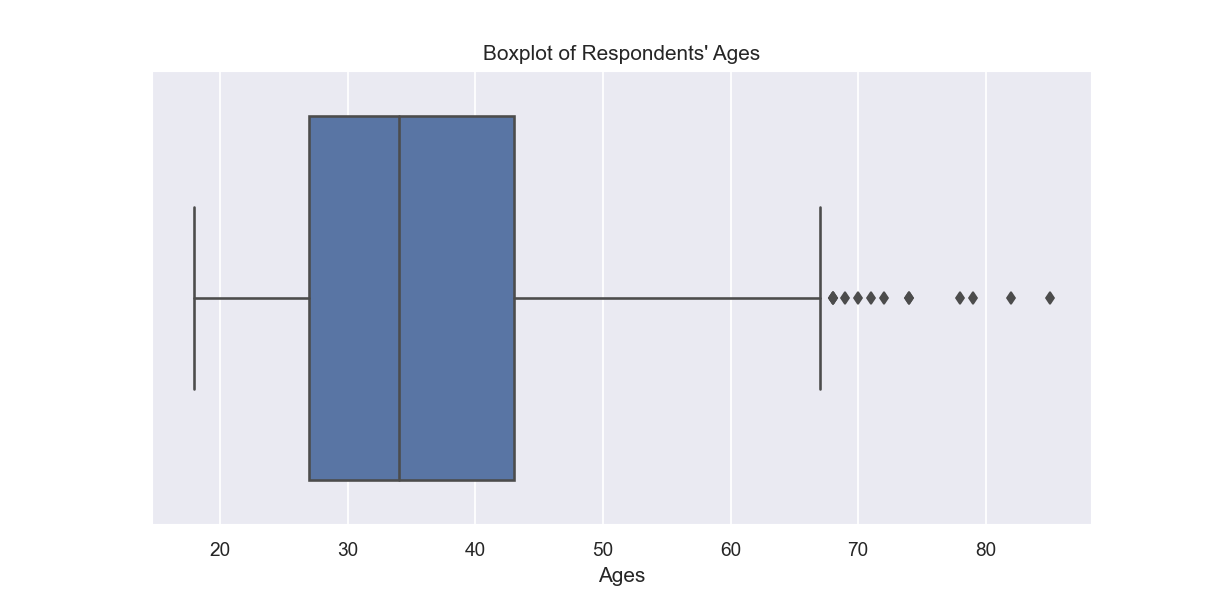

In [11]:
# Users' age distribution

# Subsetting age variable 
ages = momo['age']

# Creating the boxplot
sns.boxplot(x=ages)

# Labelling and showing the plot
plt.title("Boxplot of Respondents' Ages")
plt.xlabel("Ages")
plt.show()

<IPython.core.display.Javascript object>


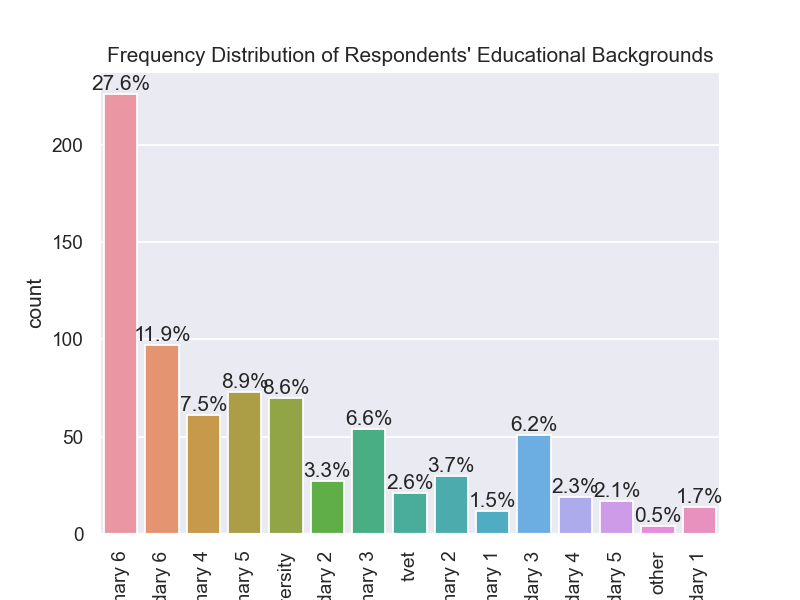

In [12]:
# Bar graph of users' educational backgrounds

# Subsetting the grade completed variable
grades = momo['highest_grade_completed']

# Instantiating the countplot
ax = sns.countplot(data=momo, x=grades)

# Calculating percentage values
total_grades = len(grades)

# Annotating the bars with percentage values
for p in ax.patches:
    percentage_grades = '{:.1f}%'.format(100 * p.get_height() / total_grades)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage_grades, (x, y), ha='center', va='bottom')

plt.title("Frequency Distribution of Respondents' Educational Backgrounds")
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


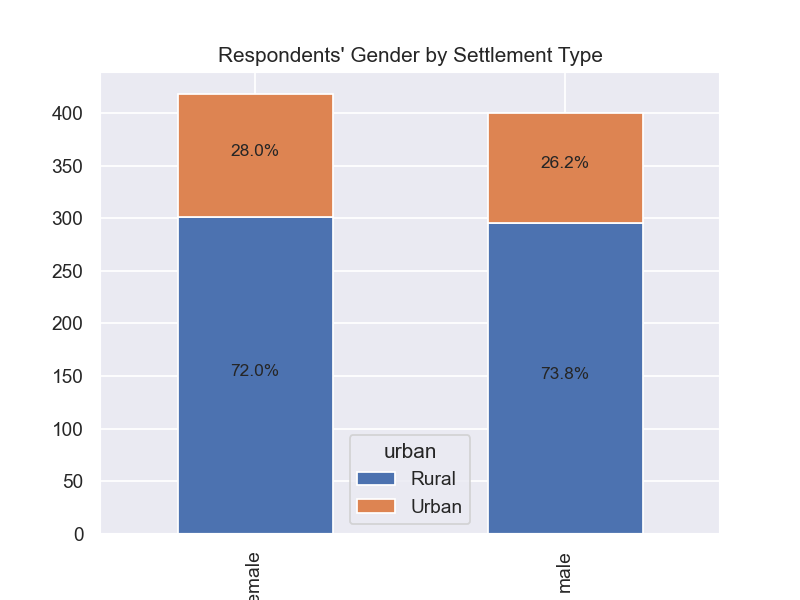

In [13]:
# Stacked bar graph of users' gender by settlement type

# Creating the stacked bar plot
gen_set = pd.crosstab(momo['gender'], momo['urban'])
ax = gen_set.plot(kind="bar", stacked=True, title="Respondents' Gender by Settlement Type")

# Calculating percentage values
total_set = gen_set.sum(axis=1)

# Annotating the portions with percentage values
for i, category in enumerate(gen_set.index):
    bottom = 0
    for j, value in enumerate(gen_set.columns):
        percentage_set = (gen_set.loc[category, value] / total_set.loc[category]) * 100
        ax.annotate(f"{percentage_set:.1f}%", (i, bottom + gen_set.loc[category, value] / 2),
                    ha='center', fontsize='10')
        bottom += gen_set.loc[category, value]


## Data Preprocessing 

In [14]:
momo.isna().sum()

hhid                         0
account_num                  0
account_type                 0
weight                       0
district                     0
urban                        0
gender                       0
age                          0
hh_members                   0
highest_grade_completed     42
mm_account_cancelled         0
prefer_cash                 14
mm_trust                    20
mm_account_telco             2
mm_account_telco_main      418
understand_terms            51
agent_trust                182
taken_loan                 559
network_issues              13
clear_about_fees            13
transaction_failed          13
agent_low_cash              15
t_and_c_copy                16
complain_channel            13
issue_resolved             582
understand_data             13
fraud_victim                13
dtype: int64

<IPython.core.display.Javascript object>


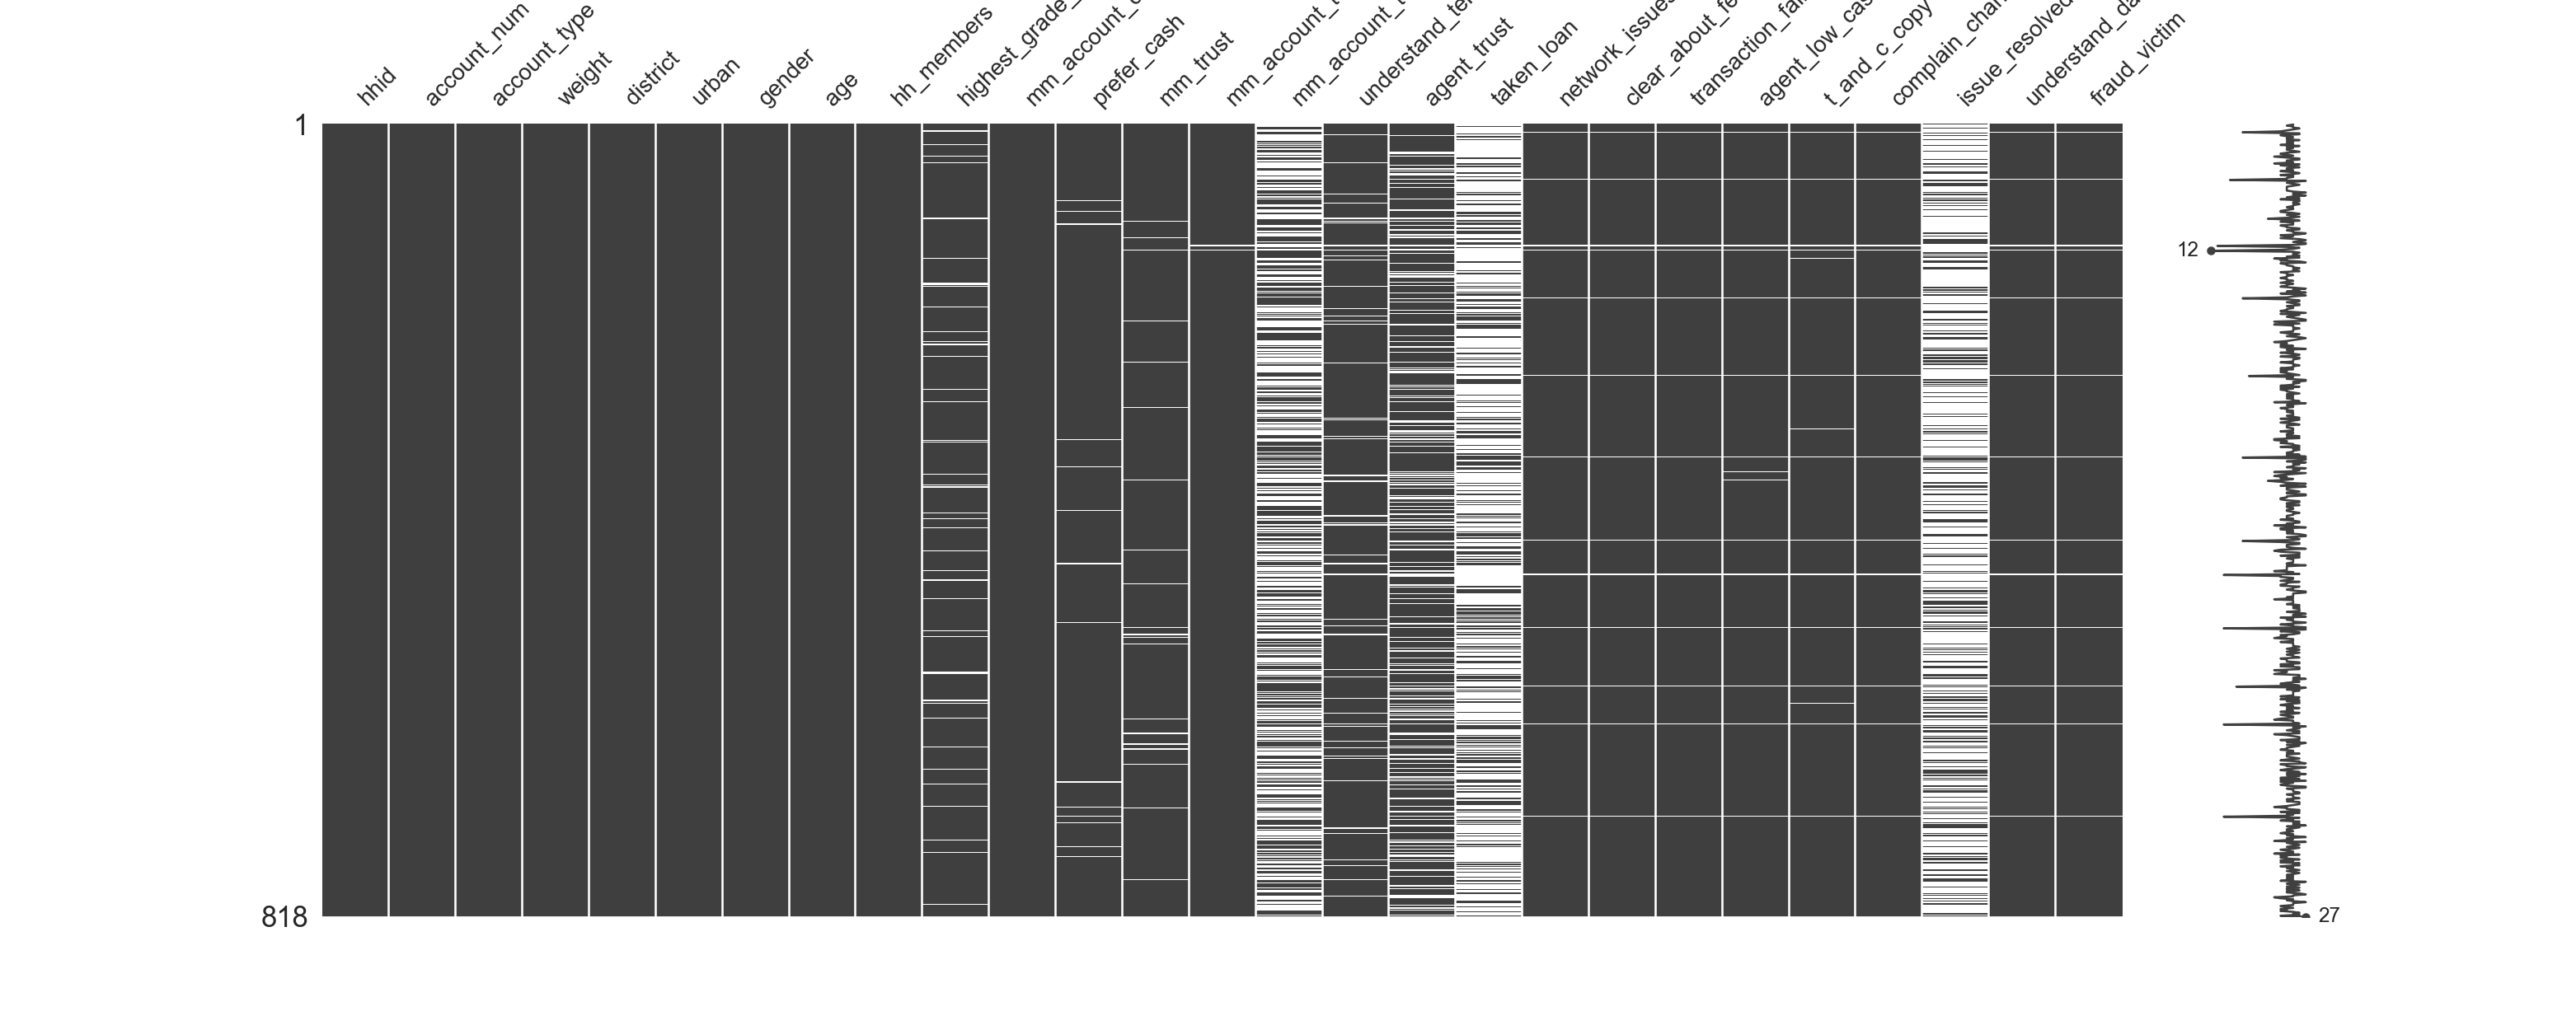

<AxesSubplot:>

In [15]:
import missingno
missingno.matrix(momo)

In [16]:
# Importing the imputer package
from sklearn.impute import SimpleImputer

# Defining the imputation strategy for mode imputation
imputer = SimpleImputer(strategy='most_frequent')

# Fitting the imputer to the data
momo_imputed = imputer.fit_transform(momo)

In [17]:
momo_imputed = pd.DataFrame(data = momo_imputed, columns = momo.columns) 

momo_imputed.head()

,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,...,taken_loan,network_issues,clear_about_fees,transaction_failed,agent_low_cash,t_and_c_copy,complain_channel,issue_resolved,understand_data,fraud_victim
0,1001,1,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,...,no,yes,yes,no,yes,no,yes,yes,yes,no
1,1003,1,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,...,no,no,yes,yes,yes,no,yes,yes,yes,no
2,1004,1,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,...,no,no,no,no,no,no,yes,yes,no,no
3,1005,1,Mobile Money,303.04395,District_C,Rural,female,28,2,primary 6,...,no,yes,yes,yes,yes,no,yes,yes,no,no
4,1008,1,Mobile Money,673.10869,District_B,Rural,male,52,5,primary 4,...,no,yes,no,no,yes,no,no,yes,no,yes


<IPython.core.display.Javascript object>


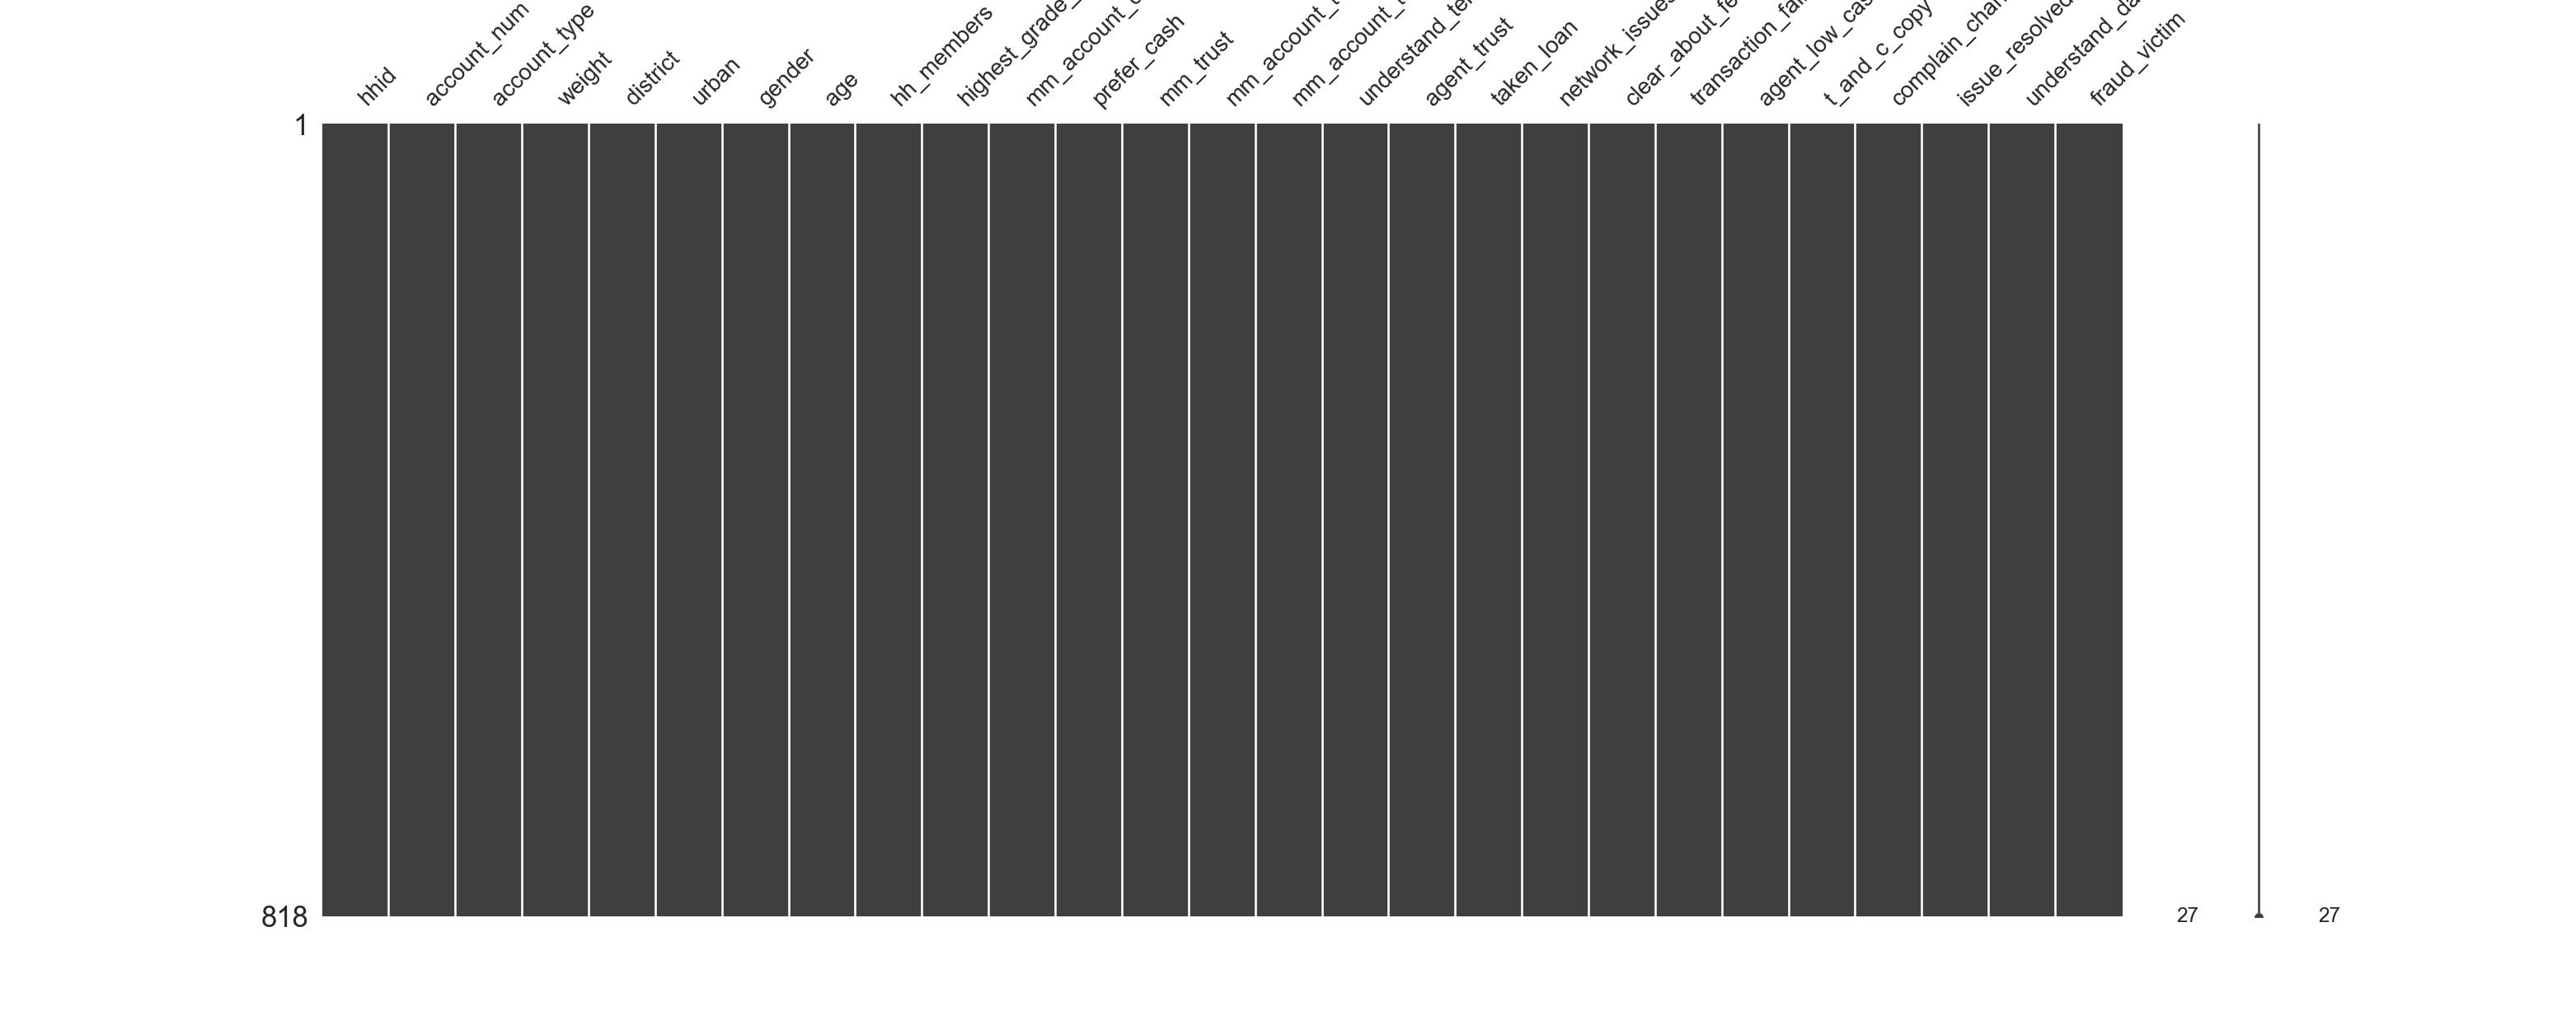

<AxesSubplot:>

In [18]:
missingno.matrix(momo_imputed)

___
## Exploratory Data Analysis - Visualizing cash preference

<IPython.core.display.Javascript object>


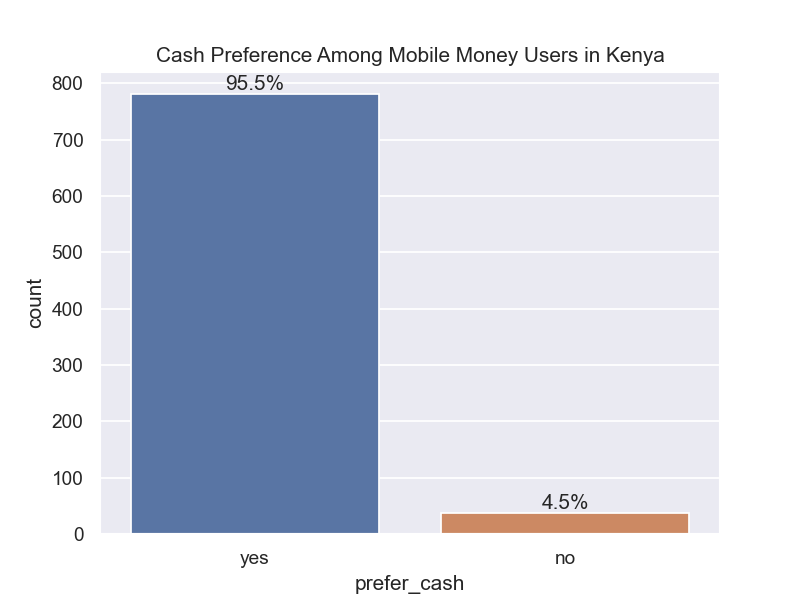

In [19]:
# Visualizing cash preference

pref = momo_imputed['prefer_cash']

ax = sns.countplot(data=momo_imputed, x=pref)

# Calculating percentage values
total_pref = len(pref)

for p in ax.patches:
    percentage_pref = '{:.1f}%'.format(100 * p.get_height() / total_pref)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage_pref, (x, y), ha='center', va='bottom')

plt.title("Cash Preference Among Mobile Money Users in Kenya")
plt.xticks(rotation=0)
plt.show()

# Preprocessing to Build Machine Learning models

## Exploratory Data Analysis - Feature Selection

In [20]:
# Subsetting user experience data together with preference of cash for ML analysis
# In addition to user experience data like network issues and failed transactions, this includes user sentiments towards the mobile money service, and their knowledge of usage conditions regarding it usage.
 
user_exp = momo_imputed[['prefer_cash', 'mm_trust', 'understand_terms', 'agent_trust', 'taken_loan', 'network_issues', 'clear_about_fees', 'transaction_failed', 'agent_low_cash', 't_and_c_copy', 'complain_channel', 'issue_resolved', 'understand_data', 'fraud_victim']]

In [21]:
user_exp = pd.get_dummies(user_exp, drop_first=True)

user_exp.head()

,prefer_cash_yes,mm_trust_yes,understand_terms_yes,agent_trust_yes,taken_loan_yes,network_issues_yes,clear_about_fees_yes,transaction_failed_yes,agent_low_cash_yes,t_and_c_copy_yes,complain_channel_yes,issue_resolved_yes,understand_data_yes,fraud_victim_yes
0,1,0,1,0,0,1,1,0,1,0,1,1,1,0
1,1,0,1,0,0,0,1,1,1,0,1,1,1,0
2,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,1,0,0,1,1,1,1,0,1,1,0,0
4,1,0,1,0,0,1,0,0,1,0,0,1,0,1


## Creating the Chi square contingency table

In [22]:
from scipy.stats import chi2_contingency

# Creating an empty DataFrame to store the chi-squared test results
results = pd.DataFrame(columns=['Feature', 'Chi2', 'P-Value'])

# Calculating the chi-squared statistic and p-value for each binary feature
for feature_name in user_exp.columns:
    contingency_table = pd.crosstab(user_exp[feature_name], user_exp['prefer_cash_yes'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results.loc[feature_name] = [feature_name, chi2, p]

# Sorting the results by p-value (ascending order)
sorted_results = results.sort_values(by='P-Value')

# Printing the sorted_results DataFrame to identify significant features
print(sorted_results)

                                       Feature        Chi2        P-Value
prefer_cash_yes                prefer_cash_yes  795.008385  6.566476e-175
agent_low_cash_yes          agent_low_cash_yes    6.781228   9.212151e-03
transaction_failed_yes  transaction_failed_yes    5.150923   2.323403e-02
issue_resolved_yes          issue_resolved_yes    4.605238   3.187442e-02
understand_data_yes        understand_data_yes    4.348555   3.704037e-02
t_and_c_copy_yes              t_and_c_copy_yes    3.172703   7.487843e-02
network_issues_yes          network_issues_yes    2.974093   8.460751e-02
fraud_victim_yes              fraud_victim_yes    2.049683   1.522379e-01
mm_trust_yes                      mm_trust_yes    1.943487   1.632904e-01
complain_channel_yes      complain_channel_yes    1.114158   2.911798e-01
understand_terms_yes      understand_terms_yes    1.038316   3.082134e-01
agent_trust_yes                agent_trust_yes    0.603890   4.370976e-01
taken_loan_yes                  taken_

## Feature Selection and Target setting

In [23]:
final = user_exp[['agent_low_cash_yes', 'transaction_failed_yes', 'issue_resolved_yes', 'understand_data_yes', 't_and_c_copy_yes', 'network_issues_yes', 'fraud_victim_yes', 'mm_trust_yes', 'complain_channel_yes', 'understand_terms_yes', 'agent_trust_yes', 'prefer_cash_yes']]

In [24]:
X = final.drop(columns=['prefer_cash_yes'])
y = final['prefer_cash_yes']

## Package Importation (Including Logistic Regression)

In [25]:
# imbalanced learn for oversampling
from imblearn.over_sampling import RandomOverSampler

# train_test_split is used to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the logistic regression classifier
from sklearn.linear_model import LogisticRegression

# importing the model evaluation metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, roc_curve, auc)

## Data Splitting, Model Training and Model Testing

In [26]:
# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiating the Oversampler
ros = RandomOverSampler(random_state=42)

#Fitting the resampled values to the data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Instantiating the classifier
logreg = LogisticRegression()

# Model fitting
logreg.fit(X_train_resampled, y_train_resampled)

# Predicting the labels of the test set
y_pred = logreg.predict(X_test)

## Model Evaluation

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  5   1]
 [ 54 104]]
              precision    recall  f1-score   support

           0       0.08      0.83      0.15         6
           1       0.99      0.66      0.79       158

    accuracy                           0.66       164
   macro avg       0.54      0.75      0.47       164
weighted avg       0.96      0.66      0.77       164



## Assessing the Model's Discriminatory Power

<IPython.core.display.Javascript object>


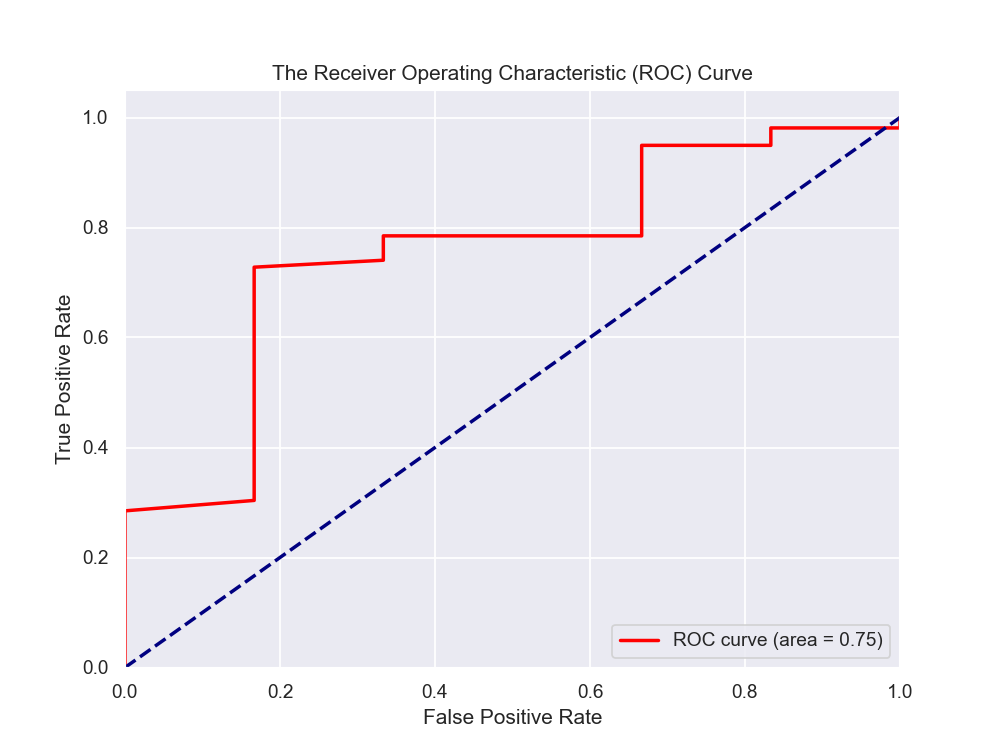

In [28]:
# Computing predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_resampled, y_train_resampled)

d_pred = dt.predict(X_test)

print(confusion_matrix(y_test, d_pred))

print(classification_report(y_test, d_pred))

[[  2   4]
 [ 35 123]]
              precision    recall  f1-score   support

           0       0.05      0.33      0.09         6
           1       0.97      0.78      0.86       158

    accuracy                           0.76       164
   macro avg       0.51      0.56      0.48       164
weighted avg       0.94      0.76      0.83       164



<IPython.core.display.Javascript object>


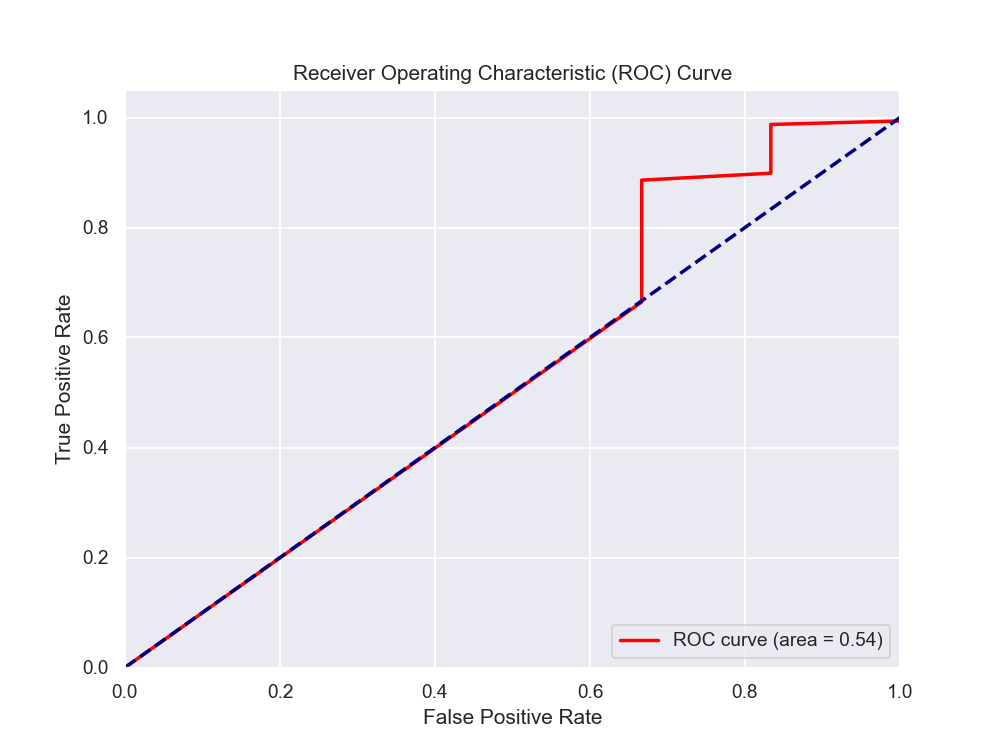

In [31]:
# Computing predicted probabilities: y_pred_prob
d_pred_prob = dt.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, d_pred_prob)

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RandF = RandomForestClassifier()

RandF.fit(X_train_resampled, y_train_resampled)

r_pred = RandF.predict(X_test)

print(confusion_matrix(y_test, r_pred))

print(classification_report(y_test, r_pred))

[[  1   5]
 [ 33 125]]
              precision    recall  f1-score   support

           0       0.03      0.17      0.05         6
           1       0.96      0.79      0.87       158

    accuracy                           0.77       164
   macro avg       0.50      0.48      0.46       164
weighted avg       0.93      0.77      0.84       164



<IPython.core.display.Javascript object>


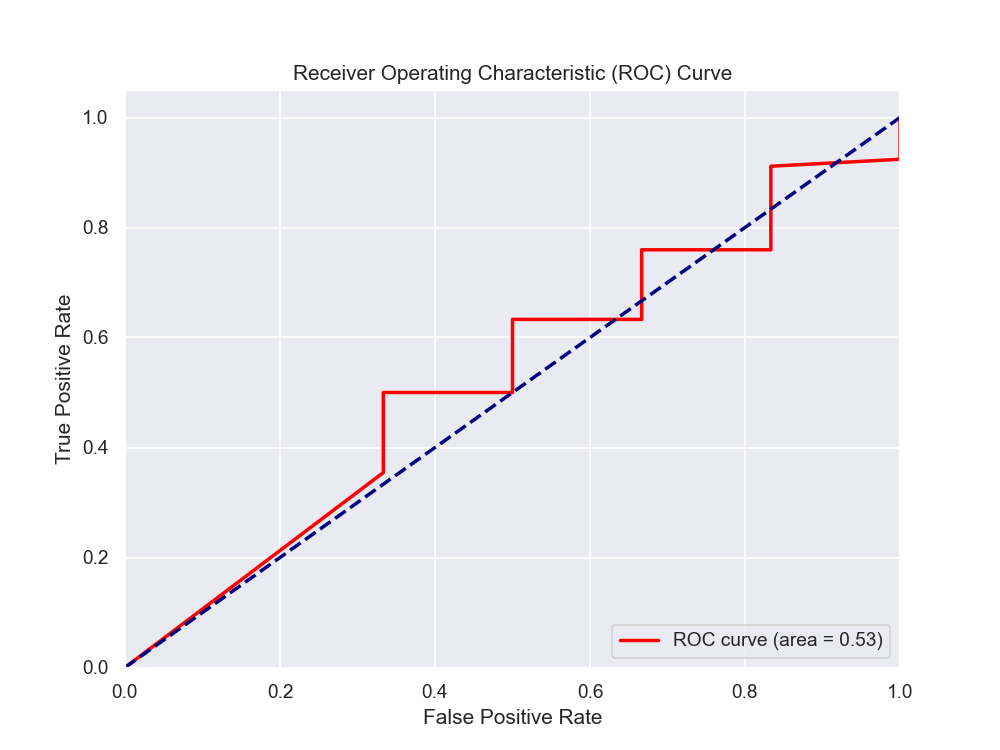

In [34]:
# Computing predicted probabilities: y_pred_prob
r_pred_prob = RandF.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, r_pred_prob)

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Machines

In [35]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(X_train_resampled, y_train_resampled)

v_pred = svm.predict(X_test)

print(confusion_matrix(y_test, v_pred))

print(classification_report(y_test, v_pred))

[[  1   5]
 [ 35 123]]
              precision    recall  f1-score   support

           0       0.03      0.17      0.05         6
           1       0.96      0.78      0.86       158

    accuracy                           0.76       164
   macro avg       0.49      0.47      0.45       164
weighted avg       0.93      0.76      0.83       164



<IPython.core.display.Javascript object>


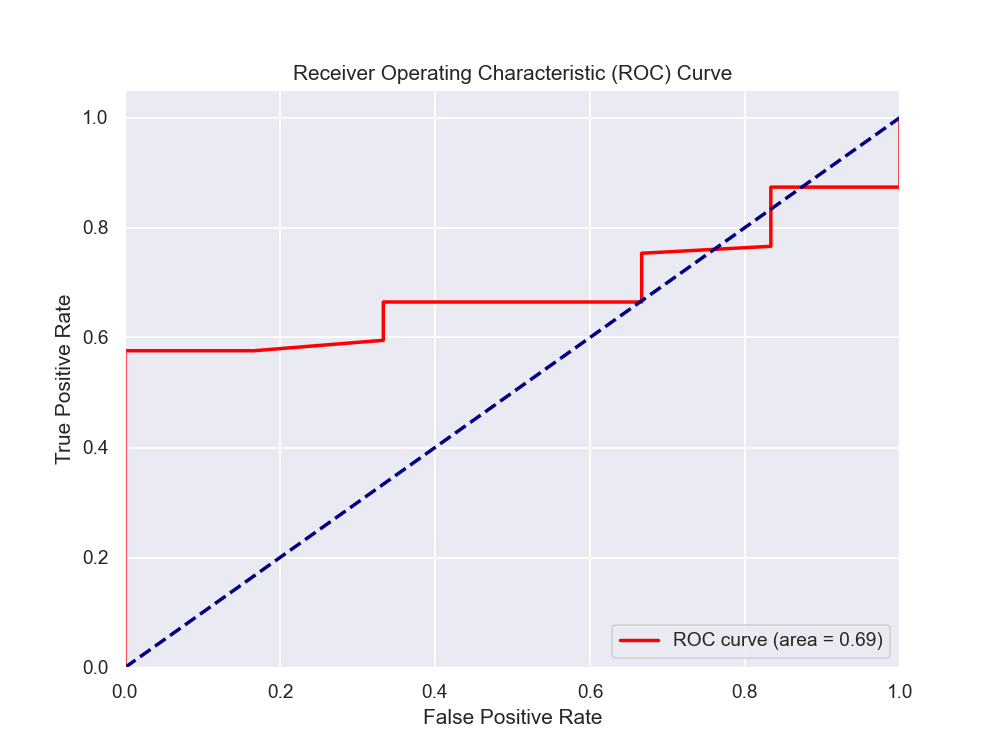

In [36]:
# Computing predicted probabilities: y_pred_prob
v_pred_prob = svm.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, v_pred_prob)

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Gradient Boost

In [37]:
import xgboost as xgb

xm = xgb.XGBClassifier()

xm.fit(X_train_resampled, y_train_resampled)

x_pred = xm.predict(X_test)

print(confusion_matrix(y_test, x_pred))

print(classification_report(y_test, x_pred))

[[  2   4]
 [ 35 123]]
              precision    recall  f1-score   support

           0       0.05      0.33      0.09         6
           1       0.97      0.78      0.86       158

    accuracy                           0.76       164
   macro avg       0.51      0.56      0.48       164
weighted avg       0.94      0.76      0.83       164



<IPython.core.display.Javascript object>


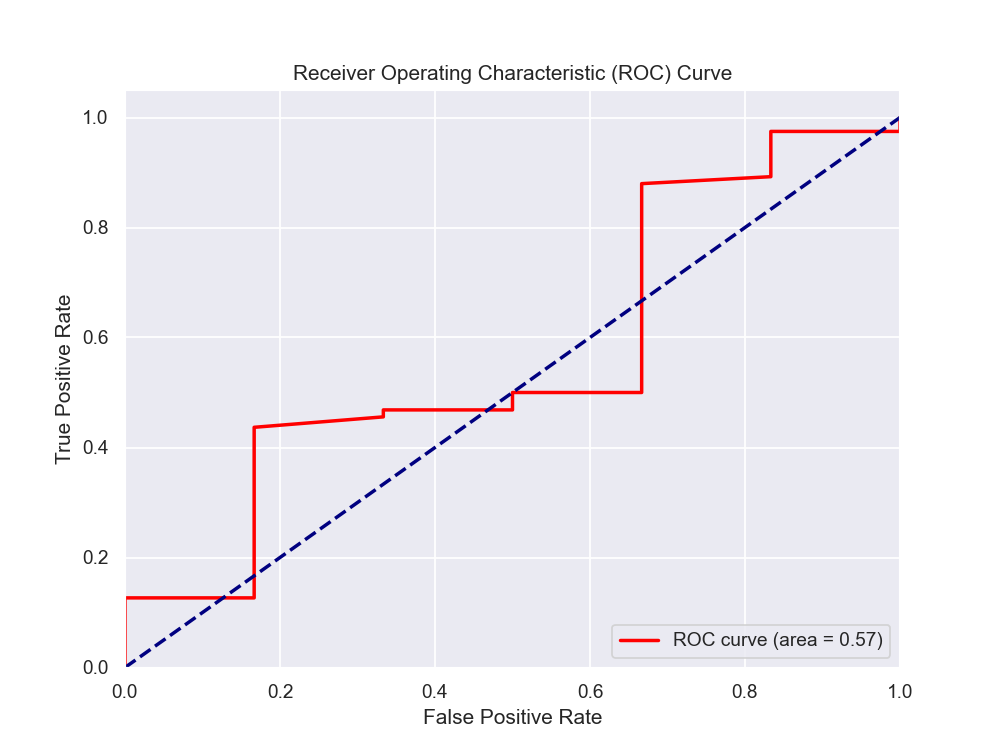

In [38]:
# Computing predicted probabilities: y_pred_prob
x_pred_prob = xm.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, x_pred_prob)

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Ultimately, a classification model is only as good as its ability do tell classes apart. By that logic, the Logistic Regression algorithm proves to be the best tool in predicting customer's inclination towards cash.